# Installation

In [ ]:
!pip install qiskit
!pip install qiskit-machine-learning
!pip install pennylane pennylane-qiskit
!pip install cirq
!pip install -q tensorflow_quantum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━

# Data preprocessing

In [ ]:
!git clone https://github.com/GeorgioFe/cse151a-group-project

Cloning into 'cse151a-group-project'...
remote: Enumerating objects: 6490, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 6490 (delta 24), reused 0 (delta 0), pack-reused 6419
Receiving objects: 100% (6490/6490), 33.52 MiB | 12.81 MiB/s, done.
Resolving deltas: 100% (24/24), done.
Updating files: 100% (6401/6401), done.


In [ ]:
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import clear_output
import pennylane as qml
from tensorflow.keras import layers, models
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
# QML tools
import tensorflow_quantum as tfq
import cirq
import sympy

# Visualization Tools
from cirq.contrib.svg import SVGCircuit

In [ ]:
def merge_subfolders(data_folder):
    #data_folder = 'Alzheimer_s Dataset/train'
    subfolders = ['MildDemented', 'ModerateDemented', 'VeryMildDemented']
    destination_folder = 'AllDemented'

    destination_path = os.path.join(data_folder, destination_folder)
    os.makedirs(destination_path, exist_ok=True)

    for subfolder in subfolders:
        subfolder_path = os.path.join(data_folder, subfolder)

        for filename in os.listdir(subfolder_path):
            #new file names subfolder_originalname
            new_filename = f"{subfolder}_{filename}"

            src = os.path.join(subfolder_path, filename)
            dst = os.path.join(destination_path, new_filename)

            shutil.copy(src, dst)

    print("Done")
    return

In [ ]:
#paths for dataset
alzheimer_train = "cse151a-group-project/dataset/train"
alzheimer_test = "cse151a-group-project/dataset/test"

merge_subfolders(alzheimer_train)
merge_subfolders(alzheimer_test)

FileNotFoundError: [Errno 2] No such file or directory: 'cse151a-group-project/dataset/train/MildDemented'

In [ ]:
def delete_other_folders(directory, keep_folders):
    """
    Delete all folders in the specified directory except the ones listed in keep_folders.

    Parameters:
    - directory: str, the path to the main directory.
    - keep_folders: list of str, the names of the folders to keep.
    """
    for folder_name in os.listdir(directory):
        folder_path = os.path.join(directory, folder_name)
        if os.path.isdir(folder_path) and folder_name not in keep_folders:
            print(f"Deleting folder: {folder_path}")
            shutil.rmtree(folder_path)
    return

In [ ]:
# Define the folders to keep
keep_folders = ['AllDemented', 'NonDemented']

# Delete other folders in the train and test directories
delete_other_folders(alzheimer_train, keep_folders)
delete_other_folders(alzheimer_test, keep_folders)

print("Completed deletion of other folders.")

Completed deletion of other folders.


In [ ]:
from skimage.color import rgb2gray
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# ImageDataGenerator for normalization only (no data augmentation)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess images from the directories
train_generator = train_datagen.flow_from_directory(alzheimer_train,
                                                    target_size=(176, 208),
                                                    batch_size=32,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(alzheimer_test,
                                                  target_size=(176, 208),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 5121 images belonging to 2 classes.
Found 1279 images belonging to 2 classes.


In [ ]:
x_train_list = []
y_train_list = []

# Iterate over the generator and collect the data
for _ in range(len(train_generator)):
    x_batch, y_batch = next(train_generator)
    x_batch_gray = np.array([rgb2gray(img) for img in x_batch])
    x_train_list.append(x_batch_gray)
    y_train_list.append(y_batch)

# Convert lists to NumPy arrays
X_train = np.concatenate(x_train_list, axis=0)
y_train = np.concatenate(y_train_list, axis=0)

In [ ]:
x_test_list = []
y_test_list = []

# Iterate over the generator and collect the data
for _ in range(len(test_generator)):
    x_batch, y_batch = next(test_generator)
    x_batch_gray = np.array([rgb2gray(img) for img in x_batch])
    x_test_list.append(x_batch_gray)
    y_test_list.append(y_batch)

# Convert lists to NumPy arrays
X_test = np.concatenate(x_test_list, axis=0)
y_test = np.concatenate(y_test_list, axis=0)

In [ ]:
X_train.shape

(5121, 176, 208)

In [ ]:
y_train.shape

(5121,)

The First Image has the label 0.0


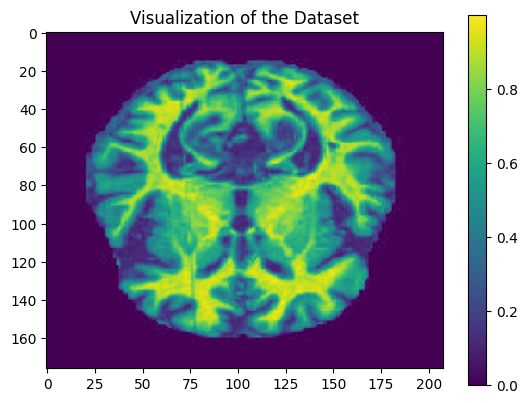

In [ ]:
print("The First Image has the label {}".format(y_train[0]))
plt.imshow(X_train[0])
plt.colorbar()
plt.title('Visualization of the Dataset')
plt.show()

The images are normalized

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 176, 208, 1)
X_test = X_test.reshape(X_test.shape[0], 176, 208, 1)

In [ ]:
print(X_train.shape)

(5121, 176, 208, 1)


Downscale the image

In [ ]:
target_size = (16, 16)

In [ ]:
X_train = tf.image.resize(X_train, target_size).numpy()
X_test = tf.image.resize(X_test, target_size).numpy()

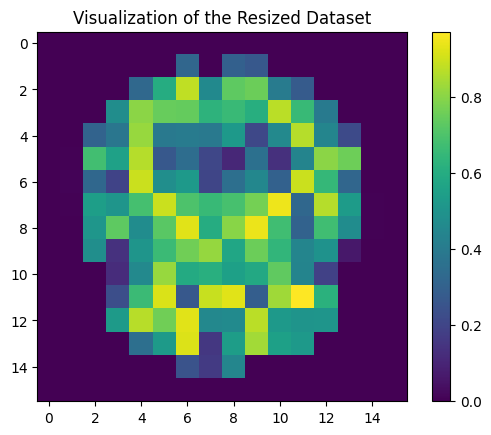

In [ ]:
plt.imshow(X_train[0,:,:,0])
plt.colorbar()
plt.title('Visualization of the Resized Dataset')
plt.show()

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.15, random_state=0)

In [ ]:
print(X_valid.shape)

(769, 16, 16, 1)


In [ ]:
X_train = X_train.reshape((X_train.shape[0], 1, 256, 1))
X_valid = X_valid.reshape((X_valid.shape[0], 1, 256, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 256, 1))

In [ ]:
def binary_encode(X,threshold=0.5):
  """
  Encodes the given datset to use binary encoding

  Parameters:
  X(array) : Image data to be processed for encoding
  threshold(float): Threshold for binary encoding, 0.5 by default

  Returns:
  encoded_images(array): Binary encoded Image Data

  """
  encoded_images = list()
  for image in X:
    # pixel value is 1 if it's greater than threshold or else zero
    encoded_image = [1 if j>threshold else 0 for j in image[0]]
    encoded_images.append(encoded_image)
  return np.array(encoded_images)

In [ ]:
X_train = binary_encode(X_train)

In [ ]:
print(X_train[0])
print("The shape of the X_train is {}".format(X_train.shape))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0
 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The shape of the X_train is (4352, 256)


In [ ]:
def create_circuit_from_image(encoded_image):
  """
  Returns a circuit for given encoded image

  Parameters:
  encoded_image (array): Encoded Image

  Returns:
  circuit (cirq.Circuit object): cirq circuit
  """
  qubits = cirq.GridQubit.rect(16,16)
  circuit = cirq.Circuit()
  for i, pixel in enumerate(encoded_image):
    if pixel:
      circuit.append(cirq.X(qubits[i]))
  return circuit

In [ ]:
X_train = [create_circuit_from_image(encoded_image) for encoded_image in X_train]

In [ ]:
print(X_train[0])

(1, 8): ─────X───

(2, 5): ─────X───

(2, 6): ─────X───

(2, 10): ────X───

(3, 4): ─────X───

(3, 5): ─────X───

(3, 7): ─────X───

(4, 3): ─────X───

(4, 4): ─────X───

(4, 11): ────X───

(5, 3): ─────X───

(5, 11): ────X───

(5, 12): ────X───

(6, 4): ─────X───

(6, 5): ─────X───

(6, 11): ────X───

(6, 12): ────X───

(7, 2): ─────X───

(7, 3): ─────X───

(7, 5): ─────X───

(7, 6): ─────X───

(7, 8): ─────X───

(7, 9): ─────X───

(7, 10): ────X───

(7, 12): ────X───

(8, 5): ─────X───

(8, 6): ─────X───

(8, 7): ─────X───

(8, 8): ─────X───

(8, 9): ─────X───

(8, 10): ────X───

(9, 2): ─────X───

(9, 10): ────X───

(10, 5): ────X───

(10, 6): ────X───

(10, 10): ───X───

(11, 5): ────X───

(11, 7): ────X───

(11, 8): ────X───

(11, 10): ───X───

(11, 11): ───X───

(11, 12): ───X───

(12, 4): ────X───

(12, 5): ────X───

(12, 6): ────X───

(12, 9): ────X───

(12, 10): ───X───

(13, 4): ────X───

(13, 5): ────X───

(13, 9): ────X───

(13, 10): ───X───


In [ ]:
X_train_tfq = tfq.convert_to_tensor(X_train)

In [ ]:
X_valid = binary_encode(X_valid)
X_test = binary_encode(X_test)

In [ ]:
X_valid = [create_circuit_from_image(encoded_image) for encoded_image in X_valid]
X_test = [create_circuit_from_image(encoded_image) for encoded_image in X_test]

In [ ]:
X_valid_tfq = tfq.convert_to_tensor(X_valid)
X_test_tfq = tfq.convert_to_tensor(X_test)

In [ ]:
class QNN():
    def __init__(self, data_qubits, readout):
      self.data_qubits = data_qubits
      self.readout = readout

    def add_singleQubit_gate(self,circuit, gate, qubit_index):
      """
      Adds single qubit gate to the circuit
      Parameters:
      circuit(cirq.Circuit object): Cirq circuit
      gate(cirq gate): gate to append to the circuit
      qubits(list): index of qubits to apply the gate
      Returns:
      None
      """
      for index in qubit_index:
        circuit.append(gate(self.data_qubits[index]))

    def add_twoQubit_gate(self,circuit, gate, qubit_index):
      """
      Adds two qubit gate to the circuit
      Parameters:
      circuit(cirq.Circuit object): Cirq circuit
      gate(cirq gate): gate to append to the circuit
      qubits(list): index of qubits to apply the gate
      Returns:
      None
      """
      if len(qubit_index)!=16:
        raise Exception("The length of the list of indices passed for two qubit \
        gate operations must be equal to two")
      circuit.append(gate(self.data_qubits[qubit_index[0]], self.data_qubits[qubit_index[1]]))

    def add_layer(self, circuit, gate, symbol_gate):
      """
      Adds New Gates/Layers to the Circuit
      Parameters:
      circuit(cirq.Circuit object): Cirq circuit
      gate(cirq gate): gate to append to the circuit
      symbol_gate(string): symbol for the gate
      Returns:
      None
      """
      for i, qubit in enumerate(self.data_qubits):
        symbol = sympy.Symbol(symbol_gate+ '-' + str(i))
        circuit.append(gate(qubit, self.readout)**symbol)

In [ ]:
def create_qnn():
    """Create a QNN model circuit and readout operation to go along with it."""
    data_qubits = cirq.GridQubit.rect(16,16)  # a 256x256 grid.
    readout = cirq.GridQubit(-1, -1)         # a single qubit at [-1,-1]
    circuit = cirq.Circuit()

    # Prepare the readout qubit.
    circuit.append(cirq.X(readout))
    circuit.append(cirq.H(readout))

    qnn = QNN(
        data_qubits = data_qubits,
        readout=readout)

    """
    # Though we don't use single and double Qubit Gates in our Circuit, we provide
    # the methods "add_singleQubit_gate" and "add_twoQubit_gate" for our Class QNN
    # that can be used to add Single and Double Qubit Gates respectively.
    # An exmaple is shown below:

    #Add Hadamard Gates
    qnn.add_singleQubit_gate(circuit, cirq.H, [0,1,2,3])

    #Add CNOT gates
    qnn.add_twoQubit_gate(circuit, cirq.CNOT, [0, 1])
    qnn.add_twoQubit_gate(circuit, cirq.CNOT, [2, 3])
    """

    # Add the ising coupling XX gate
    qnn.add_layer(circuit, cirq.XX, "xx")
    qnn.add_layer(circuit, cirq.ZZ, "zz")

    # Finally, prepare the readout qubit.
    circuit.append(cirq.H(readout))

    return circuit, cirq.Z(readout)

In [ ]:
qmodel, model_readout = create_qnn()

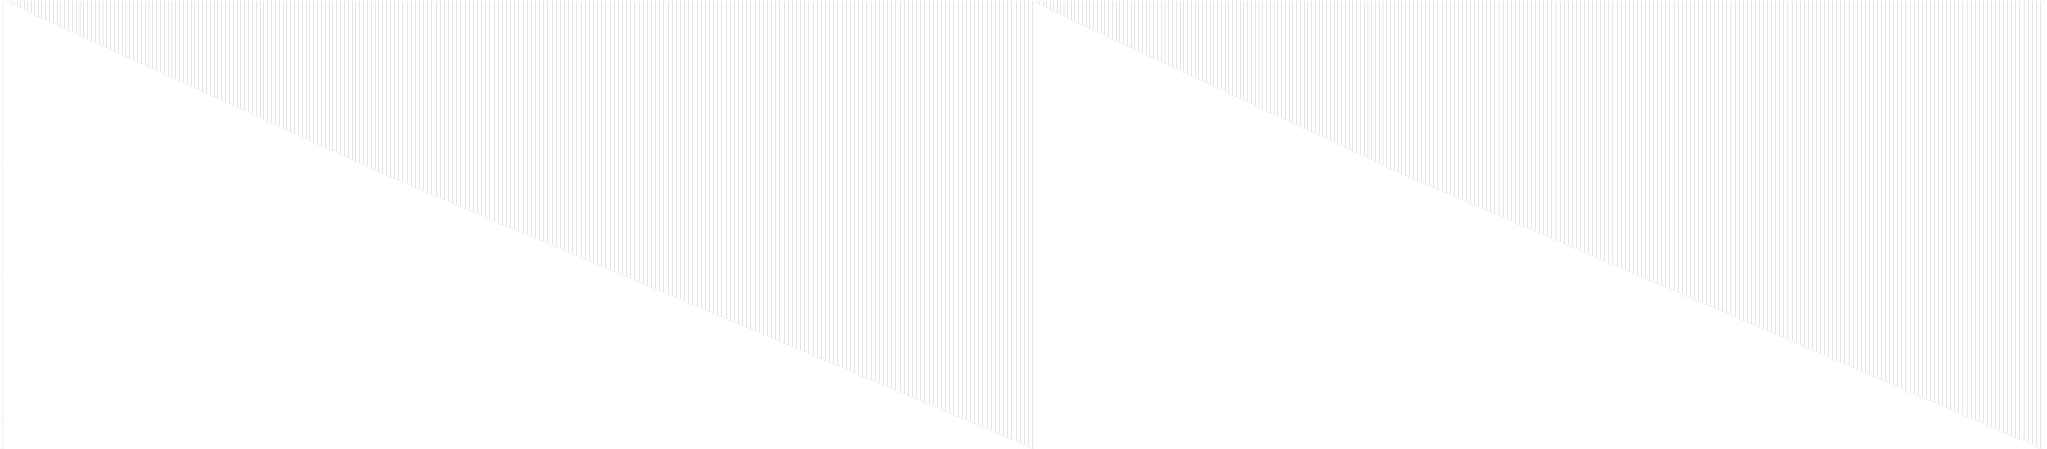

In [ ]:
SVGCircuit(qmodel)

In [ ]:
model = tf.keras.Sequential([

    # The input is the data-circuit, encoded as a tf.string
    tf.keras.layers.Input(shape=(), dtype=tf.string),


    # The PQC stands for Paramaterized Quantum Circuit
    # This returns the expectation value
    tfq.layers.PQC(qmodel, model_readout),
])

In [ ]:
# To use Hinge Loss, we convert the labels to 1 and -1
y_train_h = np.array([1 if i==1 else -1 for i in y_train ])
y_valid_h = np.array([1 if i==1 else -1 for i in y_valid ])
y_test_h = np.array([1 if i==1 else -1 for i in y_test ])

In [ ]:
print(y_train_h[0])

-1


In [ ]:
def hinge_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true) > 0.0
    y_pred = tf.squeeze(y_pred) > 0.0
    result = tf.cast(y_true == y_pred, tf.float32)

    return tf.reduce_mean(result)

In [ ]:
model.compile(
    loss=tf.keras.losses.Hinge(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[hinge_accuracy])

In [ ]:
qnn_history = model.fit(
      X_train_tfq, y_train_h,
      batch_size=64,
      epochs=10,
      verbose=1,
      validation_data=(X_valid_tfq, y_valid_h))

Epoch 1/10


In [ ]:
plt.plot(qnn_history.history['hinge_accuracy'])
plt.plot(qnn_history.history['val_hinge_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc="best")
plt.show()